# Visualizing Convolutional Networks for MRI-based Diagnosis of Alzheimer’s Disease

# Imports 
Releveant Libraries

In [1]:
import numpy as np
import pandas as pd
import torch

Relevant Local Files

In [2]:
import utils, datasets, models

# Load data
Reading CSV and Creating Dataframe

In [3]:
# File paths to the training and validation CSV tables
table_train = r'C:\AD_detection_v2\ADNI1_Screening_1.5T_8_25_2024_Train.csv'  # Path to the training dataset CSV file
image_dir = r'D:\ADNI data'  # Directory where the image data is stored
table_val = r'C:\AD_detection_v2\ADNI1_Screening_1.5T_8_25_2024_Val.csv'  # Path to the validation dataset CSV file

# Load the training dataset using the load_data_table function from the datasets module

# df_train will store the processed data, associating the table data with the image directory
df_train = datasets.load_data_table(table_train, image_dir)

# Load the validation dataset similarly
df_val = datasets.load_data_table(table_val, image_dir)

Loading dataframe for C:\AD_detection_v2\ADNI1_Screening_1.5T_8_25_2024_Train.csv
Found 224 images in table
Filtered out 0 of 224 images because of failed preprocessing
Filtered out 0 of 224 images because of missing files
Final dataframe contains 224 images from 224 patients

Loading dataframe for C:\AD_detection_v2\ADNI1_Screening_1.5T_8_25_2024_Val.csv
Found 90 images in table
Filtered out 0 of 90 images because of failed preprocessing
Filtered out 0 of 90 images because of missing files
Final dataframe contains 90 images from 90 patients



Let's look at the table. Each row is a single MRI image. Some important columns in the table:

- Image Data ID: Image  Data ID
- Subject: Patient ID
- Group: Diagnosis (CN=control, MCI=mild cognitive impairment, AD=Alzheimer's disease)
- Other Demographic Details of Patient like Sex, Age
- filepath: The path to the MRI image 

In [4]:

df_train.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,filepath
0,I118671,002_S_0295,CN,M,85,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled_2,Processed,4/18/2006,NiFTI,2024-01-02 00:00:00,D:\ADNI data/CN and AD/CN/002_S_0295/MPR__Grad...
1,I118689,002_S_0955,AD,F,78,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled_2,Processed,2006-11-10 00:00:00,NiFTI,2024-01-02 00:00:00,D:\ADNI data/CN and AD/AD/002_S_0955/MPR__Grad...
2,I62377,002_S_1261,CN,F,71,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/15/2007,NiFTI,2024-01-02 00:00:00,D:\ADNI data/CN and AD/CN/002_S_1261/MPR__Grad...
3,I60056,002_S_1280,CN,F,71,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/13/2007,NiFTI,2024-01-02 00:00:00,D:\ADNI data/CN and AD/CN/002_S_1280/MPR__Grad...
4,I52781,003_S_0907,CN,F,89,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2006-11-09 00:00:00,NiFTI,2024-01-02 00:00:00,D:\ADNI data/CN and AD/CN/003_S_0907/MPR__Grad...


In [5]:
# Convert training and validation DataFrames to NumPy arrays
patients_train = df_train.to_numpy()
patients_val = df_val.to_numpy()

# Concatenate training and validation DataFrames
df = pd.concat([df_train, df_val])

Building Dataset

In [6]:
train_dataset, val_dataset = datasets.build_datasets(df, patients_train, patients_val)

+-------+----------+---------+---------+------------+---------+---------+
|       |   Images |   -> AD |   -> CN |   Patients |   -> AD |   -> CN |
+=======+==========+=========+=========+============+=========+=========+
| All   |      314 |     152 |     162 |        314 |     152 |     162 |
+-------+----------+---------+---------+------------+---------+---------+
| Train |      224 |     112 |     112 |        224 |     112 |     112 |
+-------+----------+---------+---------+------------+---------+---------+
| Val   |       90 |      40 |      50 |         90 |      40 |      50 |
+-------+----------+---------+---------+------------+---------+---------+

Dataset is already normalized


Plotting Raw Images

0.0 1.1781276 None None


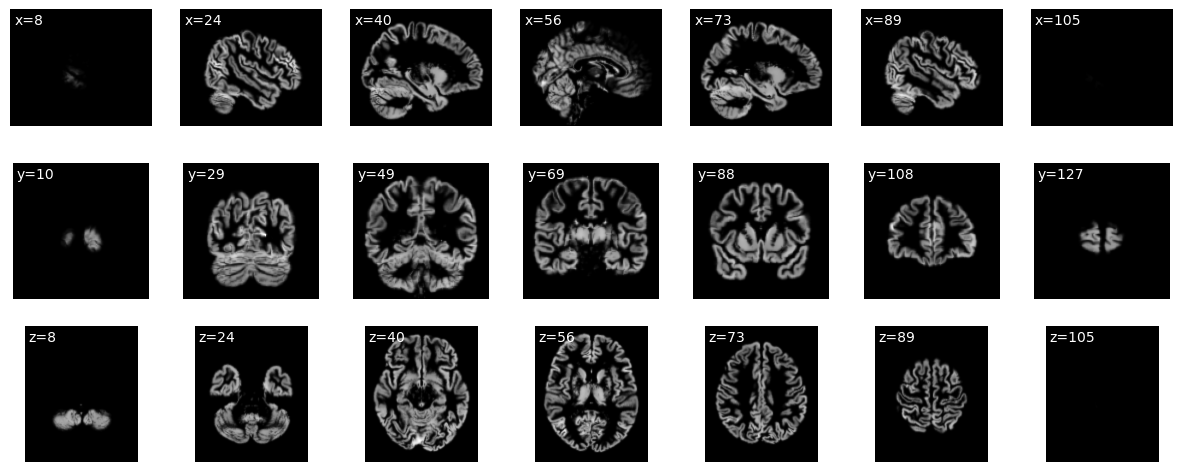

In [7]:
# Plot the first MRI scan from the training dataset
i = 0  # Index of the MRI scan to plot
utils.plot_slices(train_dataset.get_raw_image(i))


0.0 1.3915809 None None


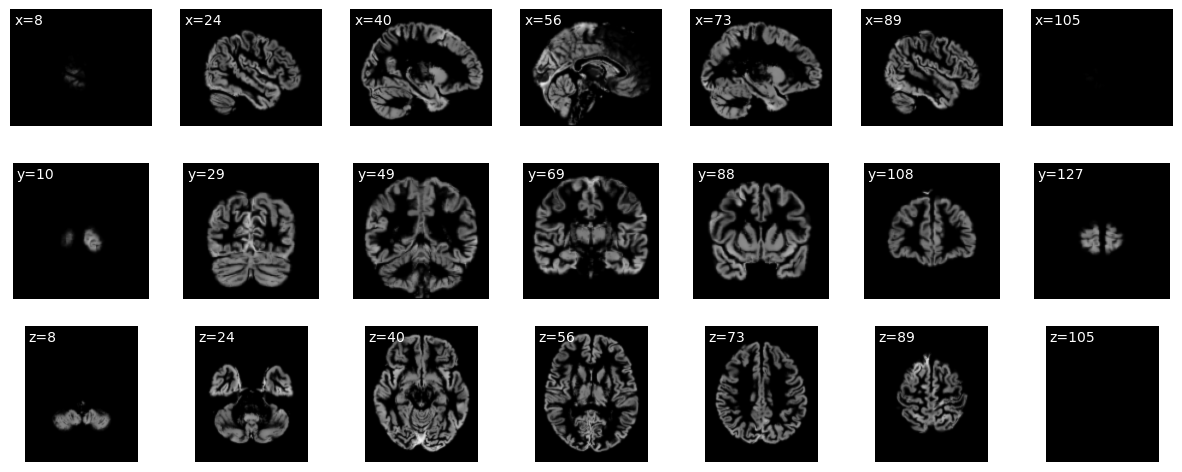

In [8]:
# Plot one MRI scan from the validation dataset
i = 0
utils.plot_slices(val_dataset.get_raw_image(i))

Building Loaders

In [9]:
# Build data loaders for the training and validation datasets
train_loader, val_loader = datasets.build_loaders(train_dataset, val_dataset)

# Create model and train

In [10]:
# This creates the model from the paper in pytorch, and wraps it in a `trainer` via torchsample.
net, trainer, cuda_device = models.build_model()

# Parameters - 
# - Learning rate: 0.0001
# - L2 regularization (weight decay): 1e-4
# - Dropout rates: 0.5 for both dropout layers
# - Architecture: 4 convolutional layers

Moved network to GPU


In [11]:
# Train the model using the specified trainer, data loaders, and device
# Training will run for 30 epochs
models.train_model(trainer, train_loader, val_loader, cuda_device, num_epoch=30)

Epoch 1/30:   2%|▏         | 1/45 [00:01<00:47,  1.08s/ batches]c:\AD_Detection_v2\models.py:210: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return super(CategoricalAccuracyWithLogits, self).__call__(F.softmax(y_pred), y_true)
Epoch 1/30: 100%|██████████| 45/45 [01:03<00:00,  2.19 batches/s, acc_metric=57.5620, loss=0.7993]c:\Users\amana\anaconda3\envs\pyt\Lib\site-packages\torchsample\modules\module_trainer.py:659: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(input_batch, volatile=volatile), Variable(target_batch, volatile=volatile, requires_grad=False)
Epoch 1/30: : 46 batches [01:34,  2.06s/ batches, val_loss=0.6647, val_acc_metric=44.4444, acc_metric=57.5620, loss=0.7993]                
Epoch 2/30: : 46 batches [01:26,  1.88s/ batches, val_loss=0.6098, val_acc_metric=76.6667, acc_metric=55.4894, loss=0.8031]                
Epoch 3/30: 

# PLOTs and ROC Calculation

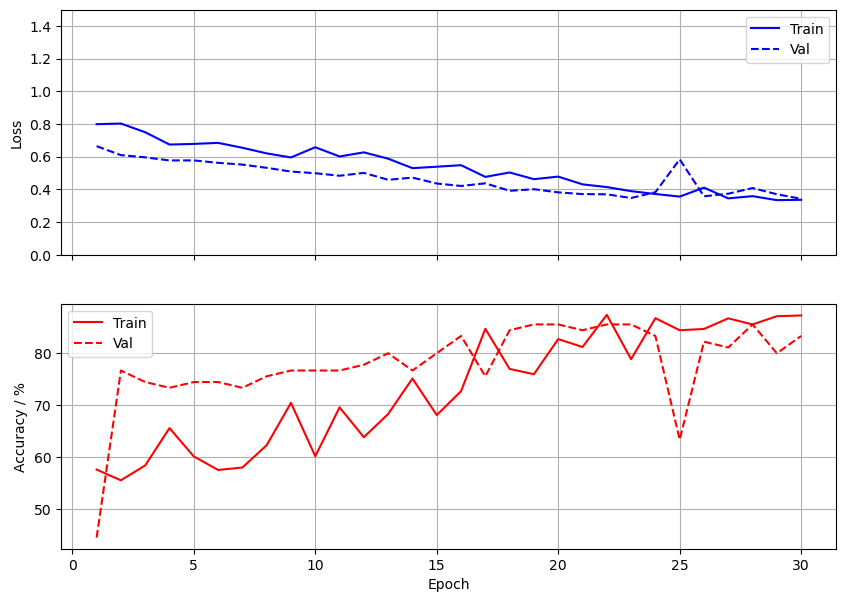

In [12]:
# Plot the learning curve based on the trainer's history
utils.plot_learning_curve(trainer.history)

In [1]:
# Calculate the ROC AUC score using the trained model on the validation set
models.calculate_roc_auc(trainer, val_loader, cuda_device)

NameError: name 'models' is not defined

# Save Model

In [14]:
# Save the entire model to a specified file
torch.save(net, 'output/models/softmax-output.pt')

# Save only the model's state dictionary (weights and biases) to a file
torch.save(net.state_dict(), 'output/models/softmax-output_state-dict.pt')